✅ Detected 13 circles.


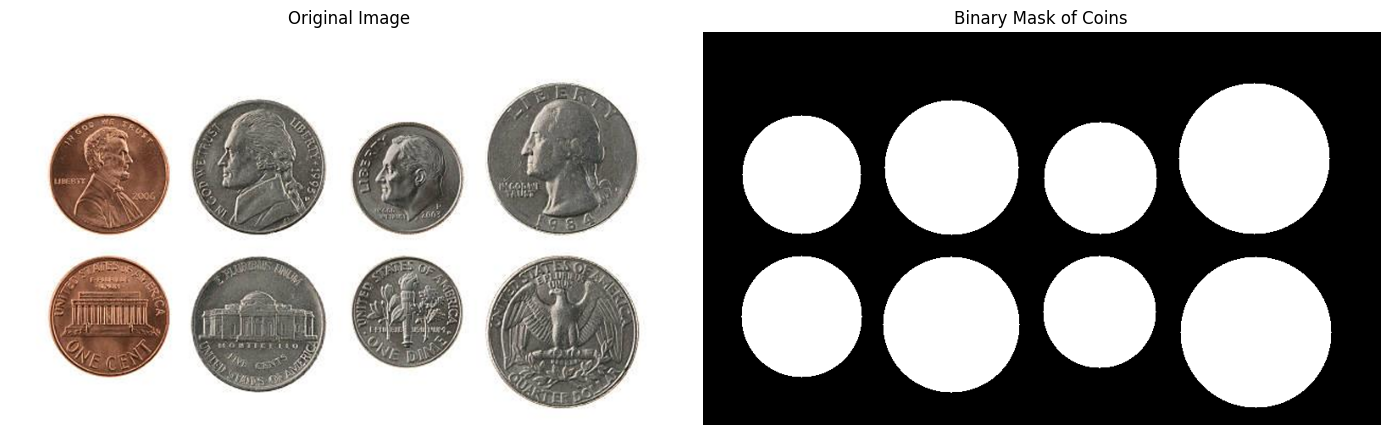

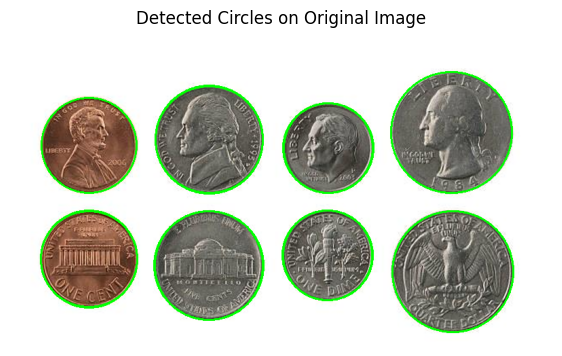

In [6]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load image from same folder as notebook
image_filename = "coins.png"  # 🔁 change if filename differs
pil_img = Image.open(image_filename).convert("RGB")
img = np.array(pil_img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Step 2: Preprocessing
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Step 3: Edge detection
edges = cv2.Canny(blurred, 50, 150)

# Step 4: Hough Transform parameters
height, width = edges.shape
r_min, r_max = 30, 100      # wider range
r_step = 1
r_range = np.arange(r_min, r_max, r_step)

accumulator = np.zeros((len(r_range), height, width), dtype=np.uint64)
y_idxs, x_idxs = np.where(edges)

# Step 5: Vote in Hough space
for i, r in enumerate(r_range):
    for x, y in zip(x_idxs, y_idxs):
        for theta in range(0, 360, 2):  # finer angle step
            a = int(x - r * np.cos(np.deg2rad(theta)))
            b = int(y - r * np.sin(np.deg2rad(theta)))
            if 0 <= a < width and 0 <= b < height:
                accumulator[i, b, a] += 1

# Step 6: Detect peaks in accumulator
threshold = 100  # lowered threshold to detect more
circles = []
for i, r in enumerate(r_range):
    acc_slice = accumulator[i]
    peaks = np.where(acc_slice > threshold)
    for y, x in zip(*peaks):
        circles.append((x, y, r))

print(f"✅ Detected {len(circles)} circles.")

# Step 7: Create binary mask of detected coins
mask = np.zeros((height, width), dtype=np.uint8)
for x, y, r in circles:
    cv2.circle(mask, (x, y), r, 255, -1)

# Step 8: Show original and mask
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Binary Mask of Coins")
plt.imshow(mask, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

# Step 9: Show detected circles on original image
img_with_circles = img.copy()
for x, y, r in circles:
    cv2.circle(img_with_circles, (x, y), r, (0, 255, 0), 2)

plt.figure(figsize=(7, 6))
plt.title("Detected Circles on Original Image")
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
